In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio
import numpy as np

In [2]:
path = '/home/lucasmarten/dataops-challenge-satellite/dataops-challenge-satellite/satellite-data-processing/processed_data/tiffs/file1.epsg:4326.tiff'

In [3]:
dataset = xr.open_dataset(path)

In [4]:
data = dataset['band_data'].values

In [5]:
lons, lats = dataset.x.values, dataset.y.values

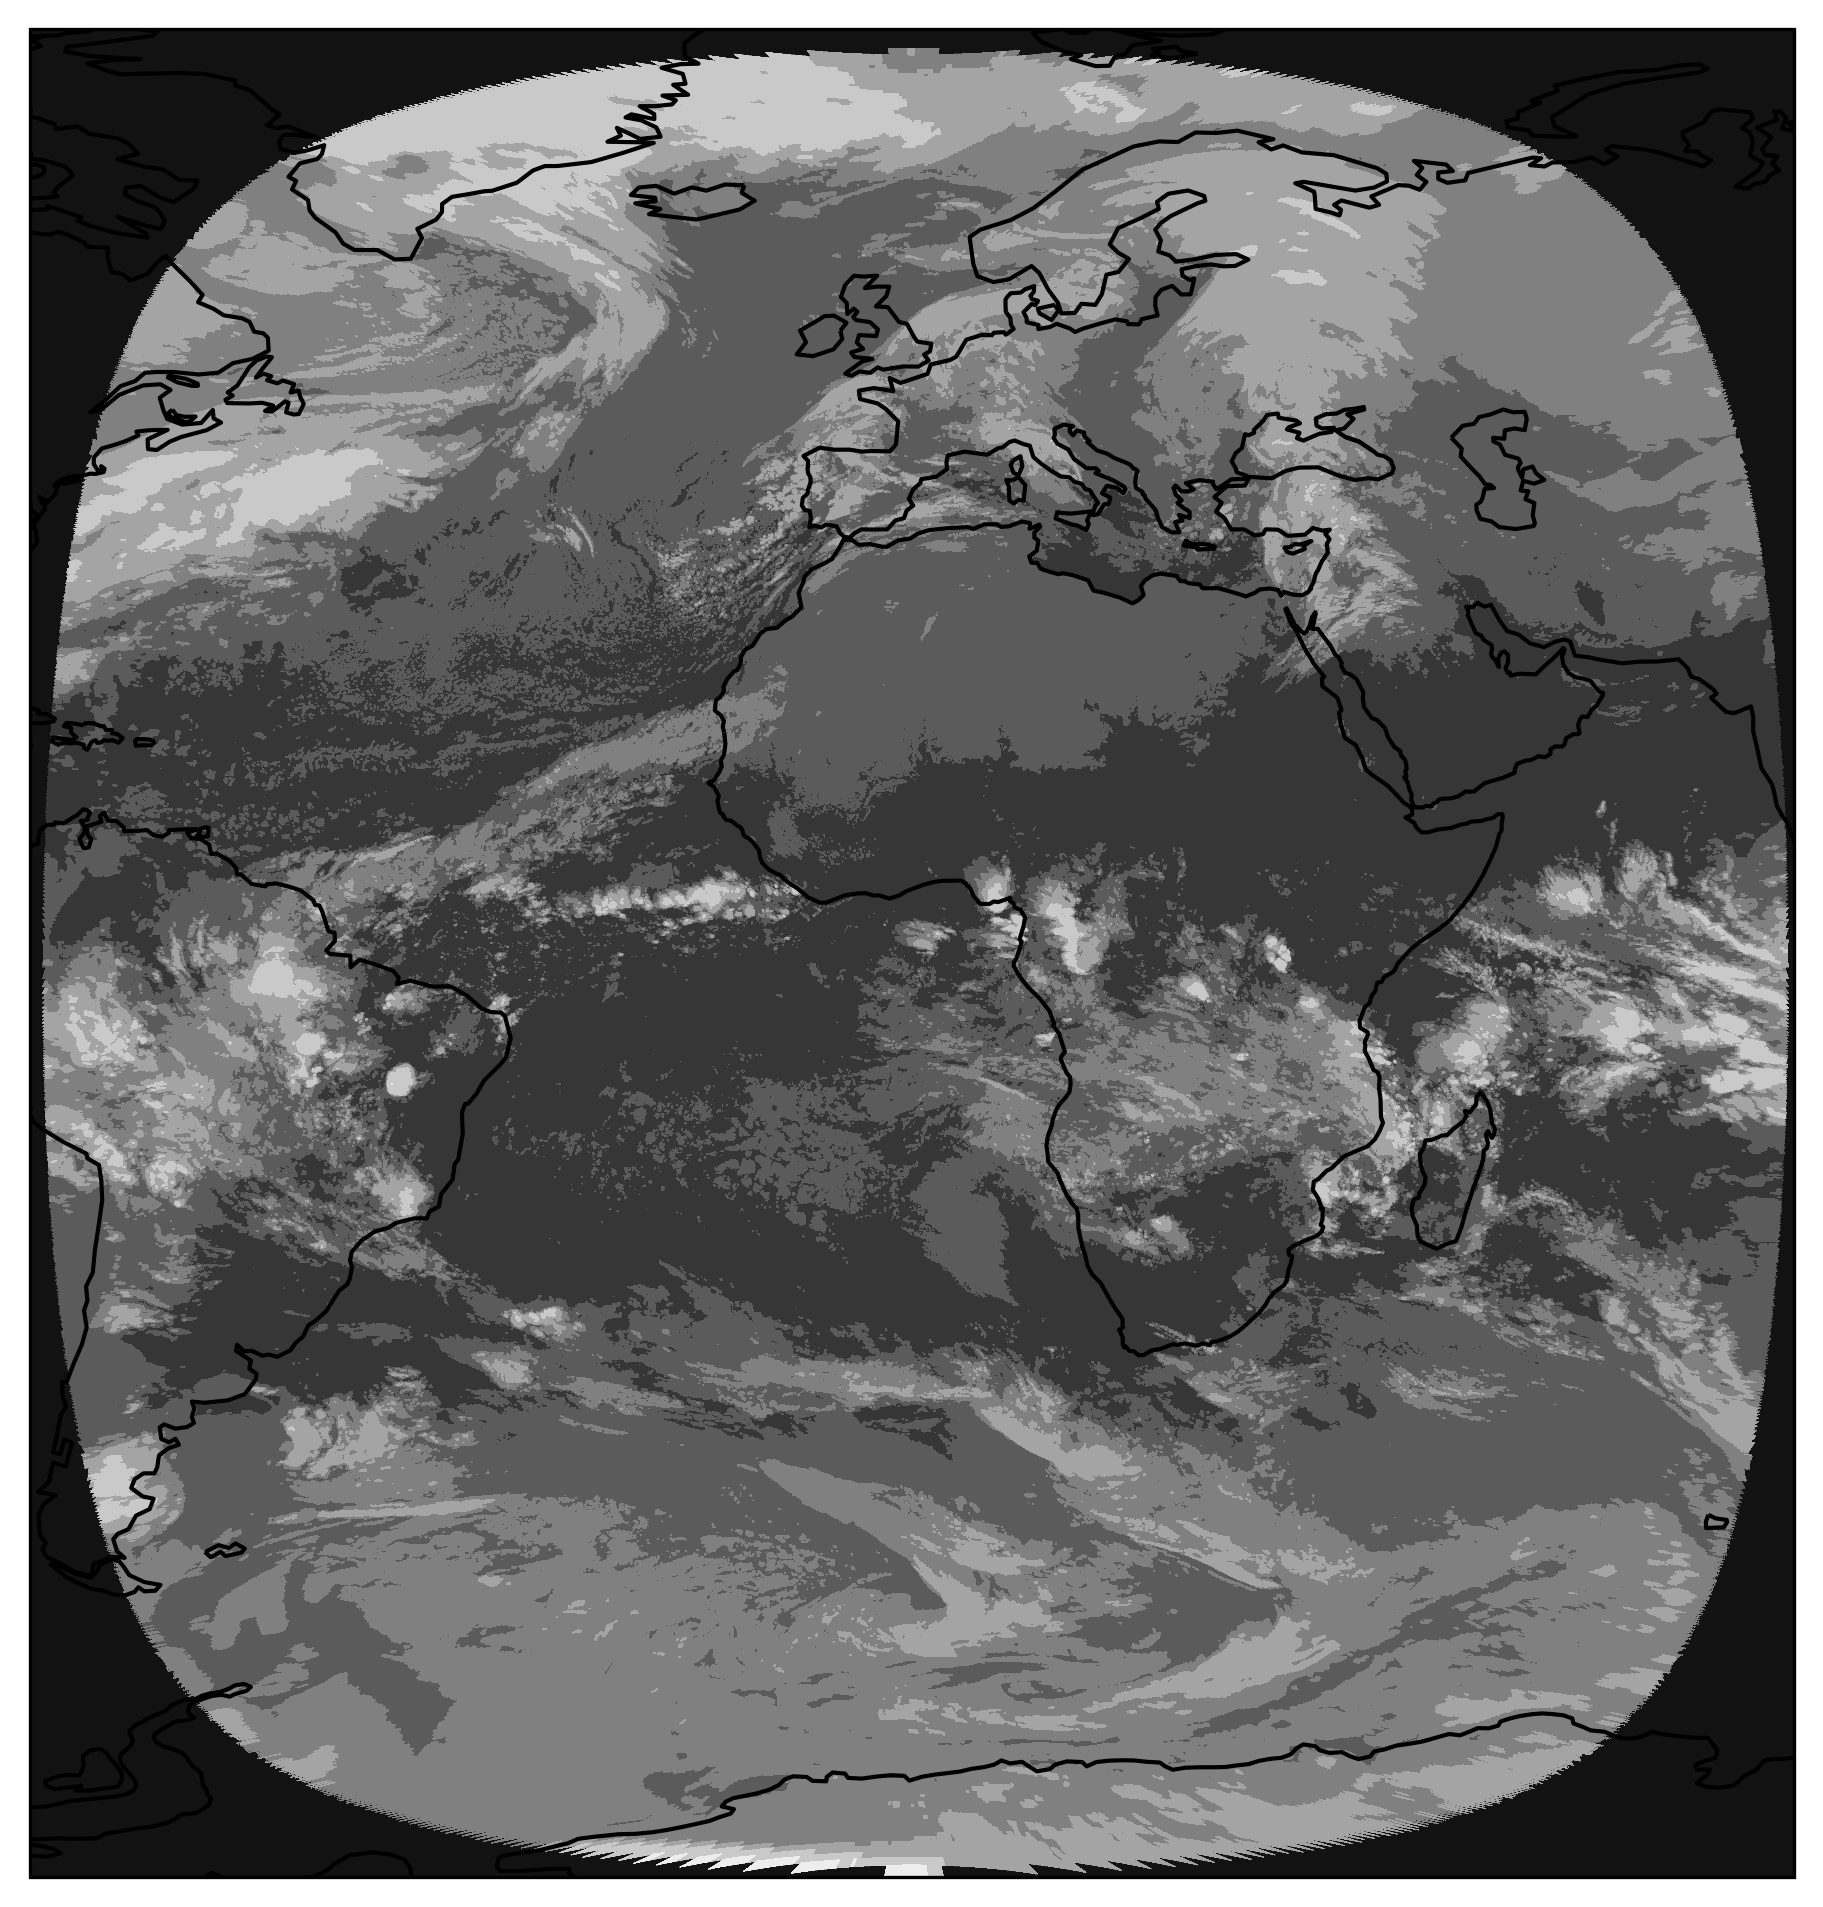

In [6]:
fig = plt.figure(figsize=(16,8), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(lons, lats, data[0], cmap='grey')
plt.show()

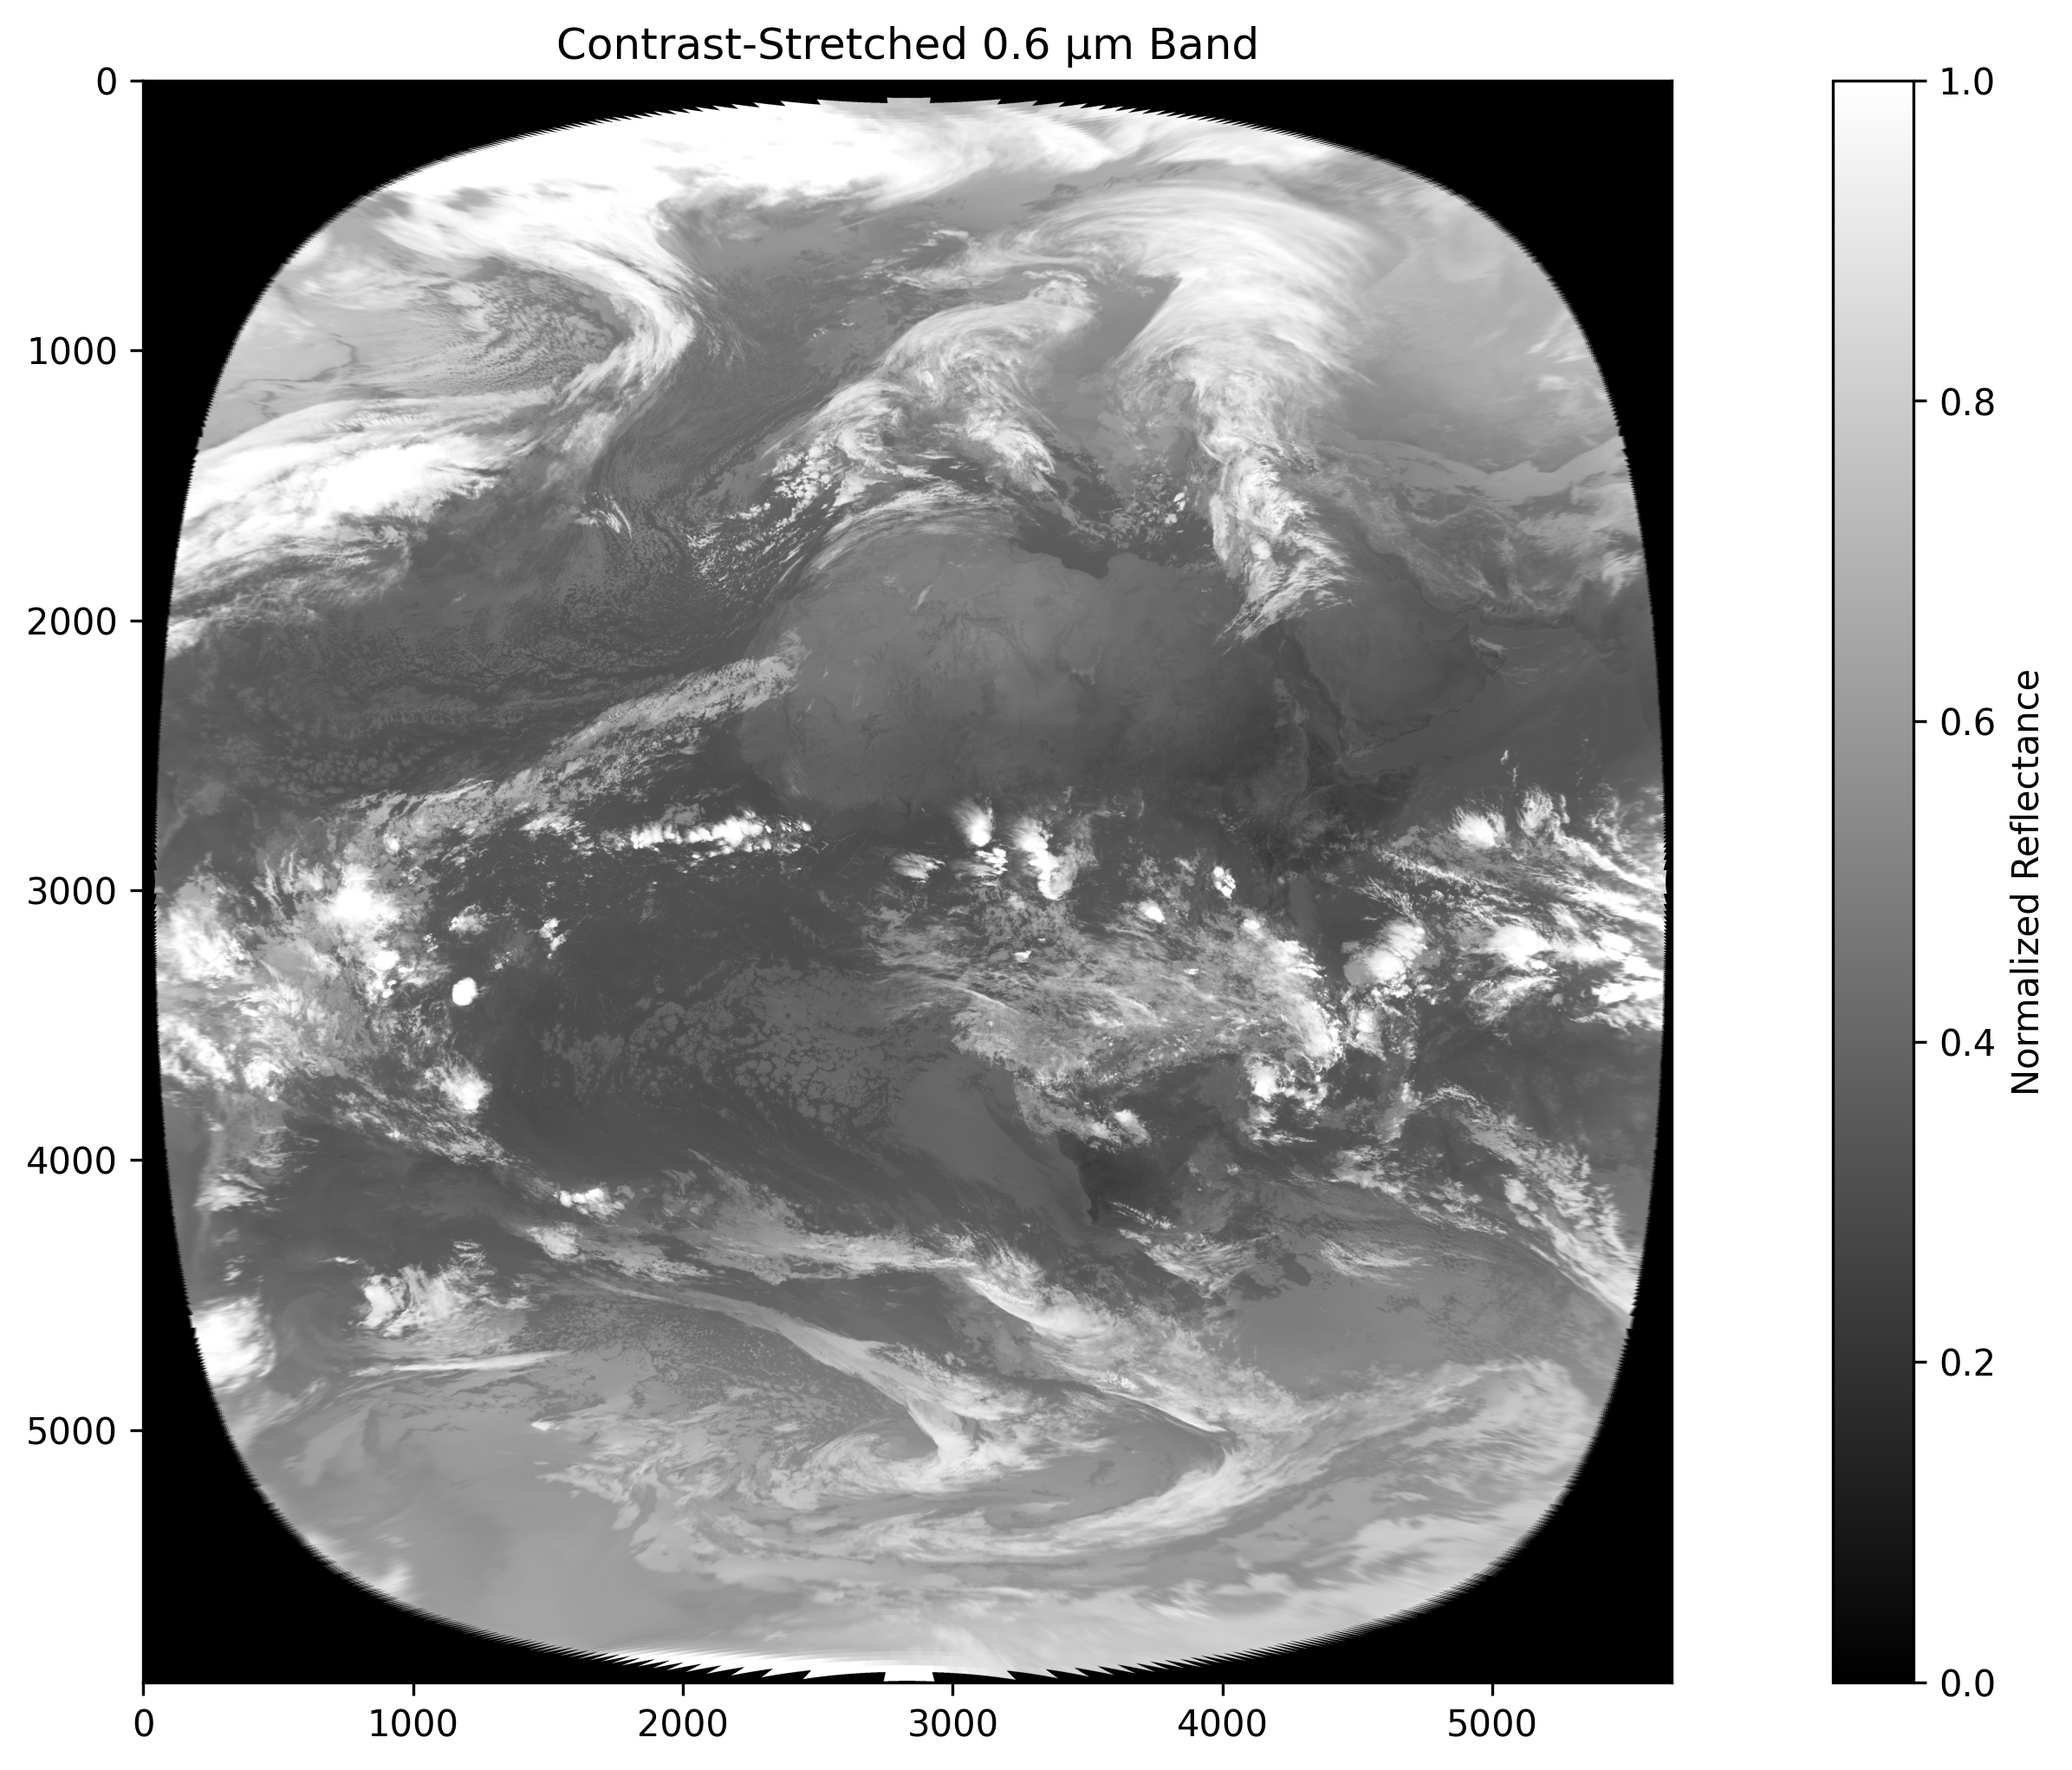

In [20]:
p2, p98 = np.percentile(data, (2, 98))
band_06_stretched = np.clip(data, p2, p98)

band_06_norm = (band_06_stretched - p2) / (p98 - p2)
fig = plt.figure(figsize=(16,8), dpi=300)

plt.imshow(band_06_norm[0], cmap="gray")
plt.colorbar(label="Normalized Reflectance")
plt.title("Contrast-Stretched 0.6 µm Band")
plt.show()
